In [3]:
import math
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook 

import sys
sys.path.insert(1, '_helperFuncs')
# self-written helper functions
import fourier_funcs as ff
import animation_funcs as af
import drawing_funcs as df

#for saving animations
import matplotlib.animation as animation   
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Ahish'), bitrate=1800)

In [4]:
# settings
samplePercentage = 1 #percentage of original no. of points to be sampled
saveAnimation = 0 #if animation is to be saved

In [5]:
# gets the drawing input
df.drawingBoard().run()

In [6]:
# generate complex points sampled numpy array
sampledPoints = np.asarray(df.pointsTouched)[::int(1/samplePercentage)]

#calculates DFT
N = len(sampledPoints)
points_fft = np.fft.fft(sampledPoints, N)

#calculates the inverse fourier to verify
generated_function = ff.inv(points_fft, N)

#gets real and imaginary part of inverse function
real = list(map(lambda x: x.real, generated_function))
imag = list(map(lambda x: x.imag, generated_function))


<IPython.core.display.Javascript object>


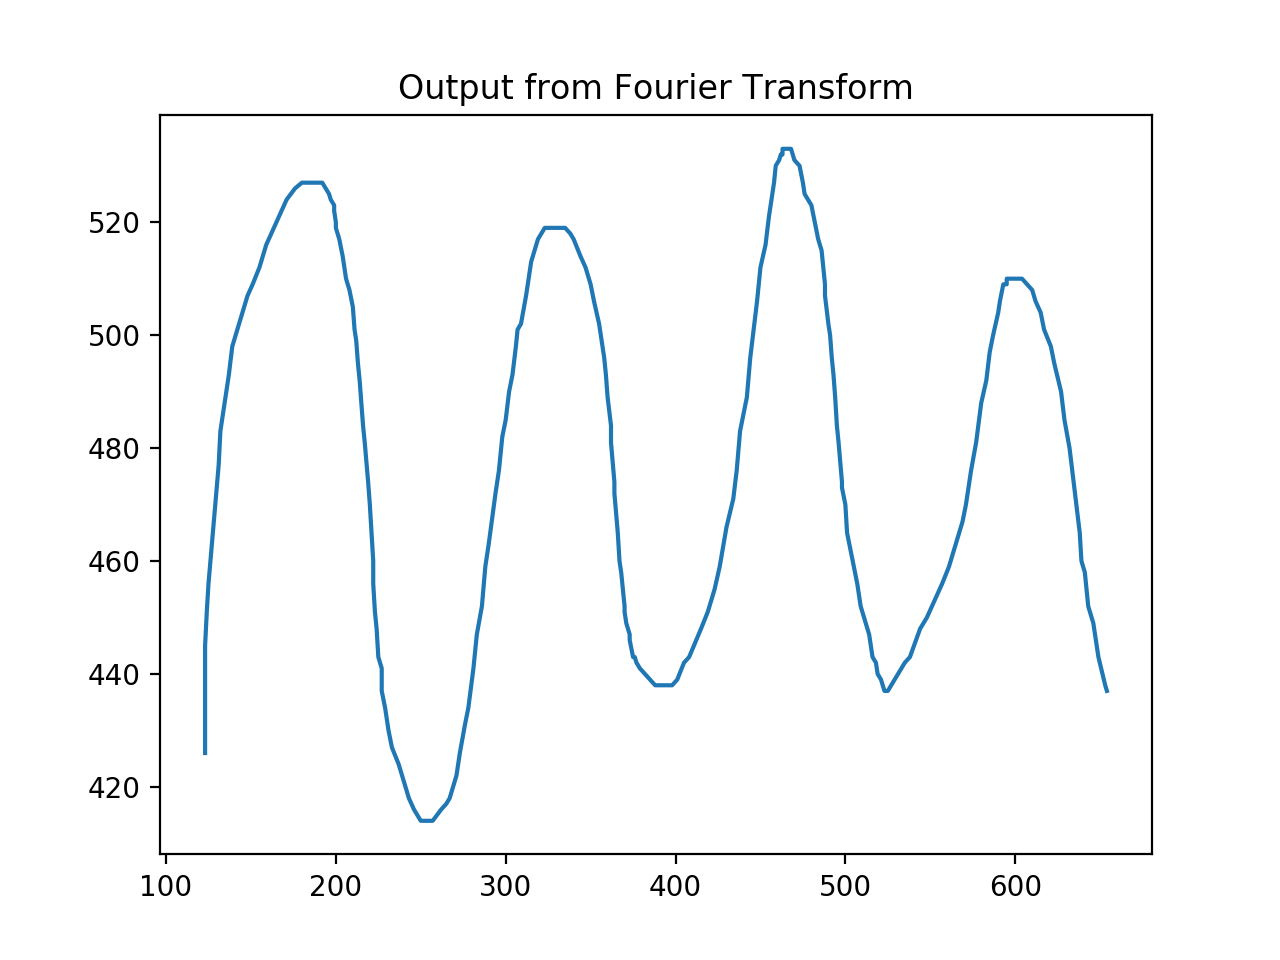

In [7]:
fig = plt.figure("Output of 3D Sinusoidal Signal Generated")
plt.title("Output from Fourier Transform")
plt.plot(real, imag)
plt.show()

<IPython.core.display.Javascript object>


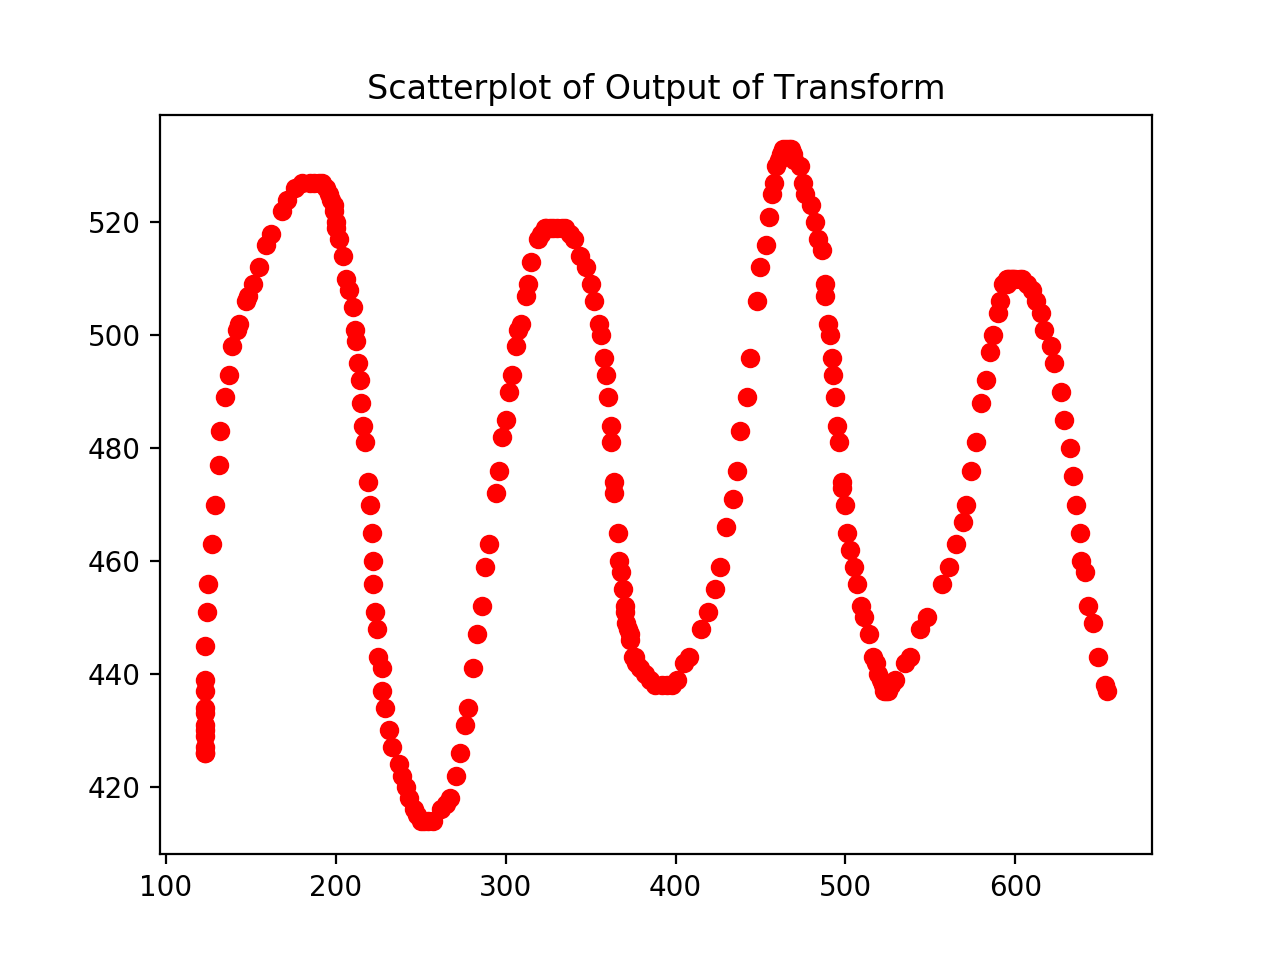

In [8]:
fig = plt.figure("Generated Points")
plt.scatter(real, imag, color='red')
plt.title("Scatterplot of Output of Transform")
plt.show()

<IPython.core.display.Javascript object>


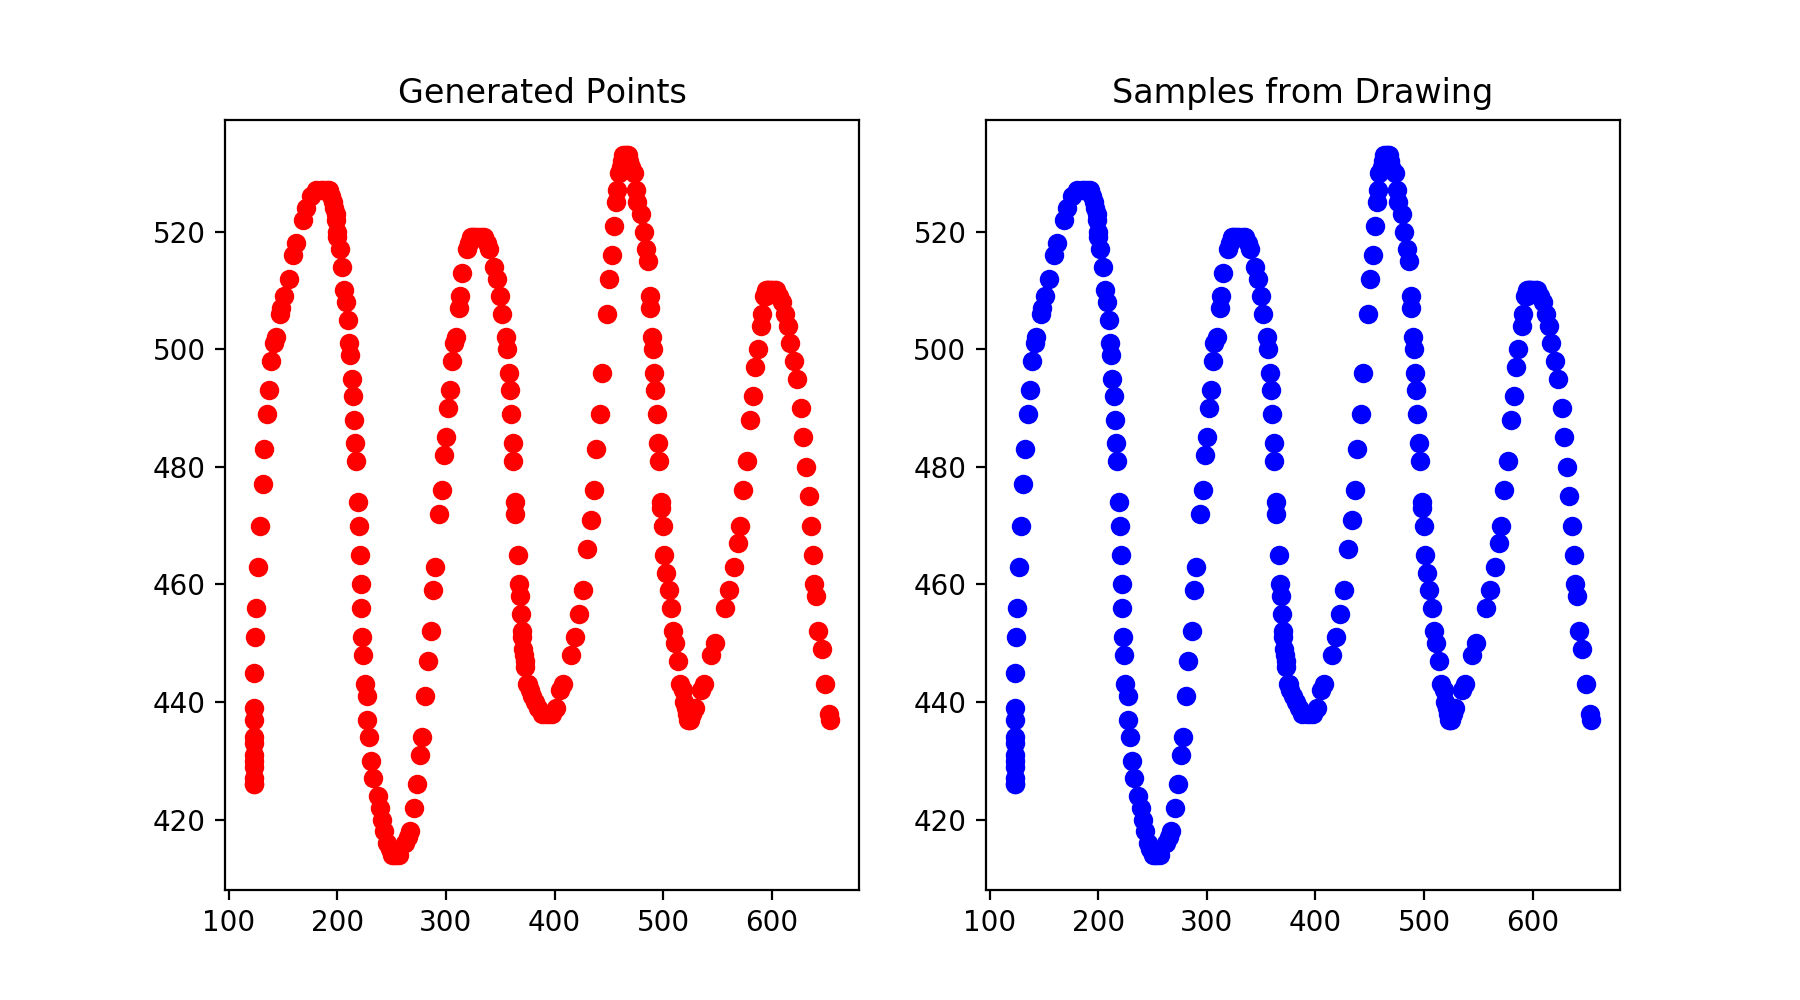

In [9]:
fig = plt.figure("Comparison of Generated Signal vs Original Drawing", figsize=(9,5))

plt.subplot(121)
plt.scatter(real, imag, color='red')
plt.title("Generated Points")

plt.subplot(122)
plt.scatter(np.real(sampledPoints), np.imag(sampledPoints), color='blue')
plt.title("Samples from Drawing")

plt.show()

In [10]:
# animation & drawing
abs_fft = np.absolute(points_fft)/N
phase_fft = np.angle(points_fft)

# useful values
n_circles = len(points_fft)

<IPython.core.display.Javascript object>


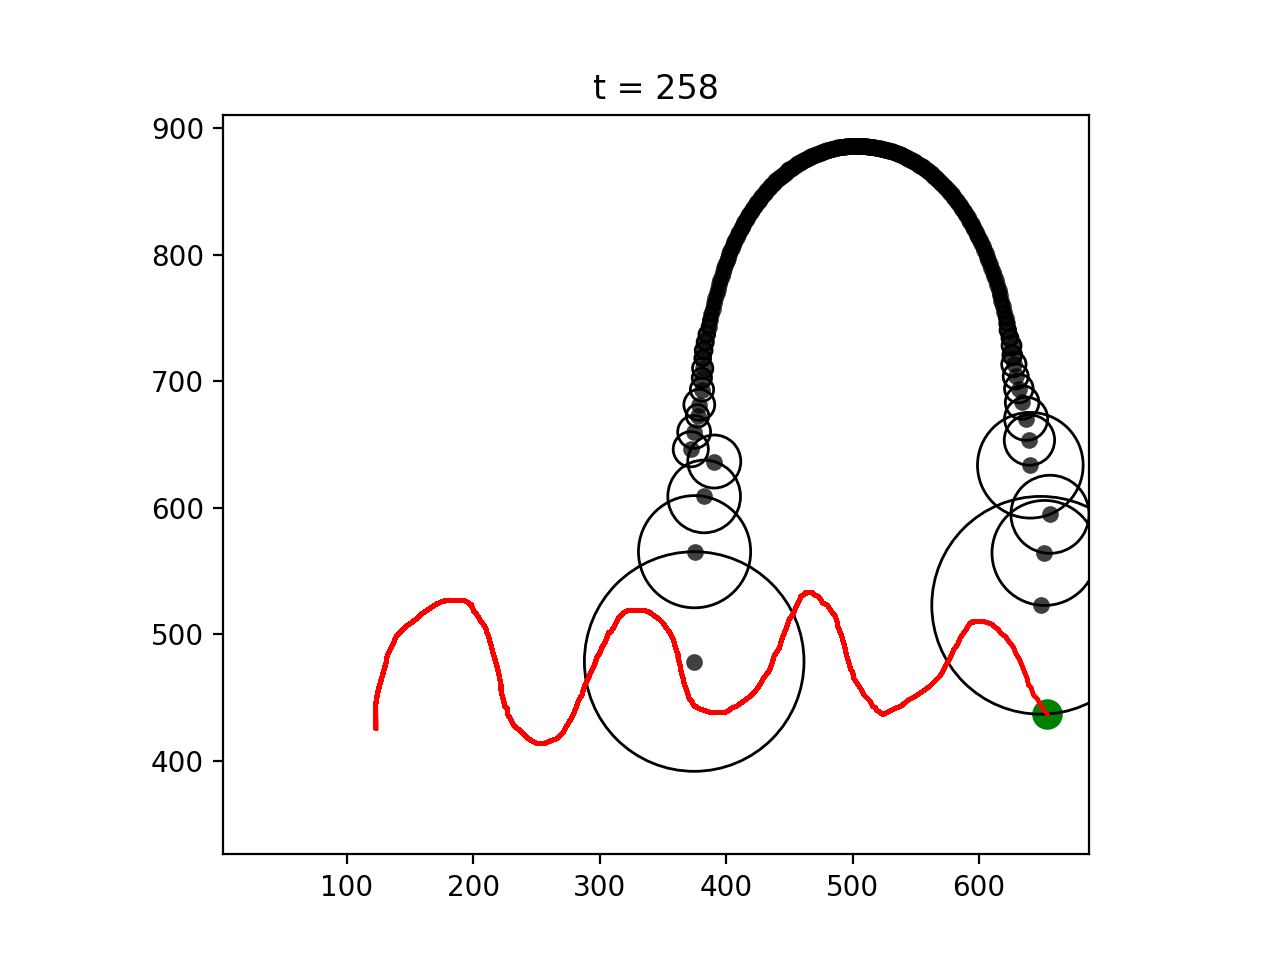

In [11]:
# Epicycle Drawing Animation
fig = plt.figure("Epicyclic Drawing of Generated Function")
circles = af.get_initVals(n_circles, abs_fft, phase_fft)
ax = plt.axes()
    
def init():
    
    initCirclesPos = af.pos_at(0, abs_fft, phase_fft)
    for i in range(n_circles):
        if i:
            circles[i].center = initCirclesPos[i]
            ax.add_patch(circles[i])
    
    # for removing the scattered points after each frame
    global dotSc
    global sc
    
    dotSc = ax.scatter([x[0] for x in initCirclesPos[1:]], [x[1] for x in initCirclesPos[1:]], color='g')  
    sc = ax.scatter(real[0], imag[0], lw=5, color='g')
    
    return circles

def animate(i):
 
    newCirclesPos = af.pos_at(i, abs_fft, phase_fft)
    for m in range(n_circles):
        if m:
            circles[m].center = newCirclesPos[m]
    
    # plotting generated function
    ax.plot(real[:i+1], imag[:i+1], color='r')
    ax.axis("scaled") 
    
    #removing & changing location of scattered points
    global dotSc
    global sc
    
    dotSc.remove()
    sc.remove()
    dotSc = ax.scatter([x[0] for x in newCirclesPos[1:]], [x[1] for x in newCirclesPos[1:]], color='black', lw=0.01, alpha=0.75)
    sc = ax.scatter(real[i], imag[i], lw=5, color='g')
    
    #shows frame number
    plt.title("t = "+str(i))
    
    return circles

anim=FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=False, repeat=False)

plt.show()
        
        

In [ ]:
# override
# saveAnimation = 1

if saveAnimation:
    anim.save("current.mp4", writer=writer)   

<IPython.core.display.Javascript object>


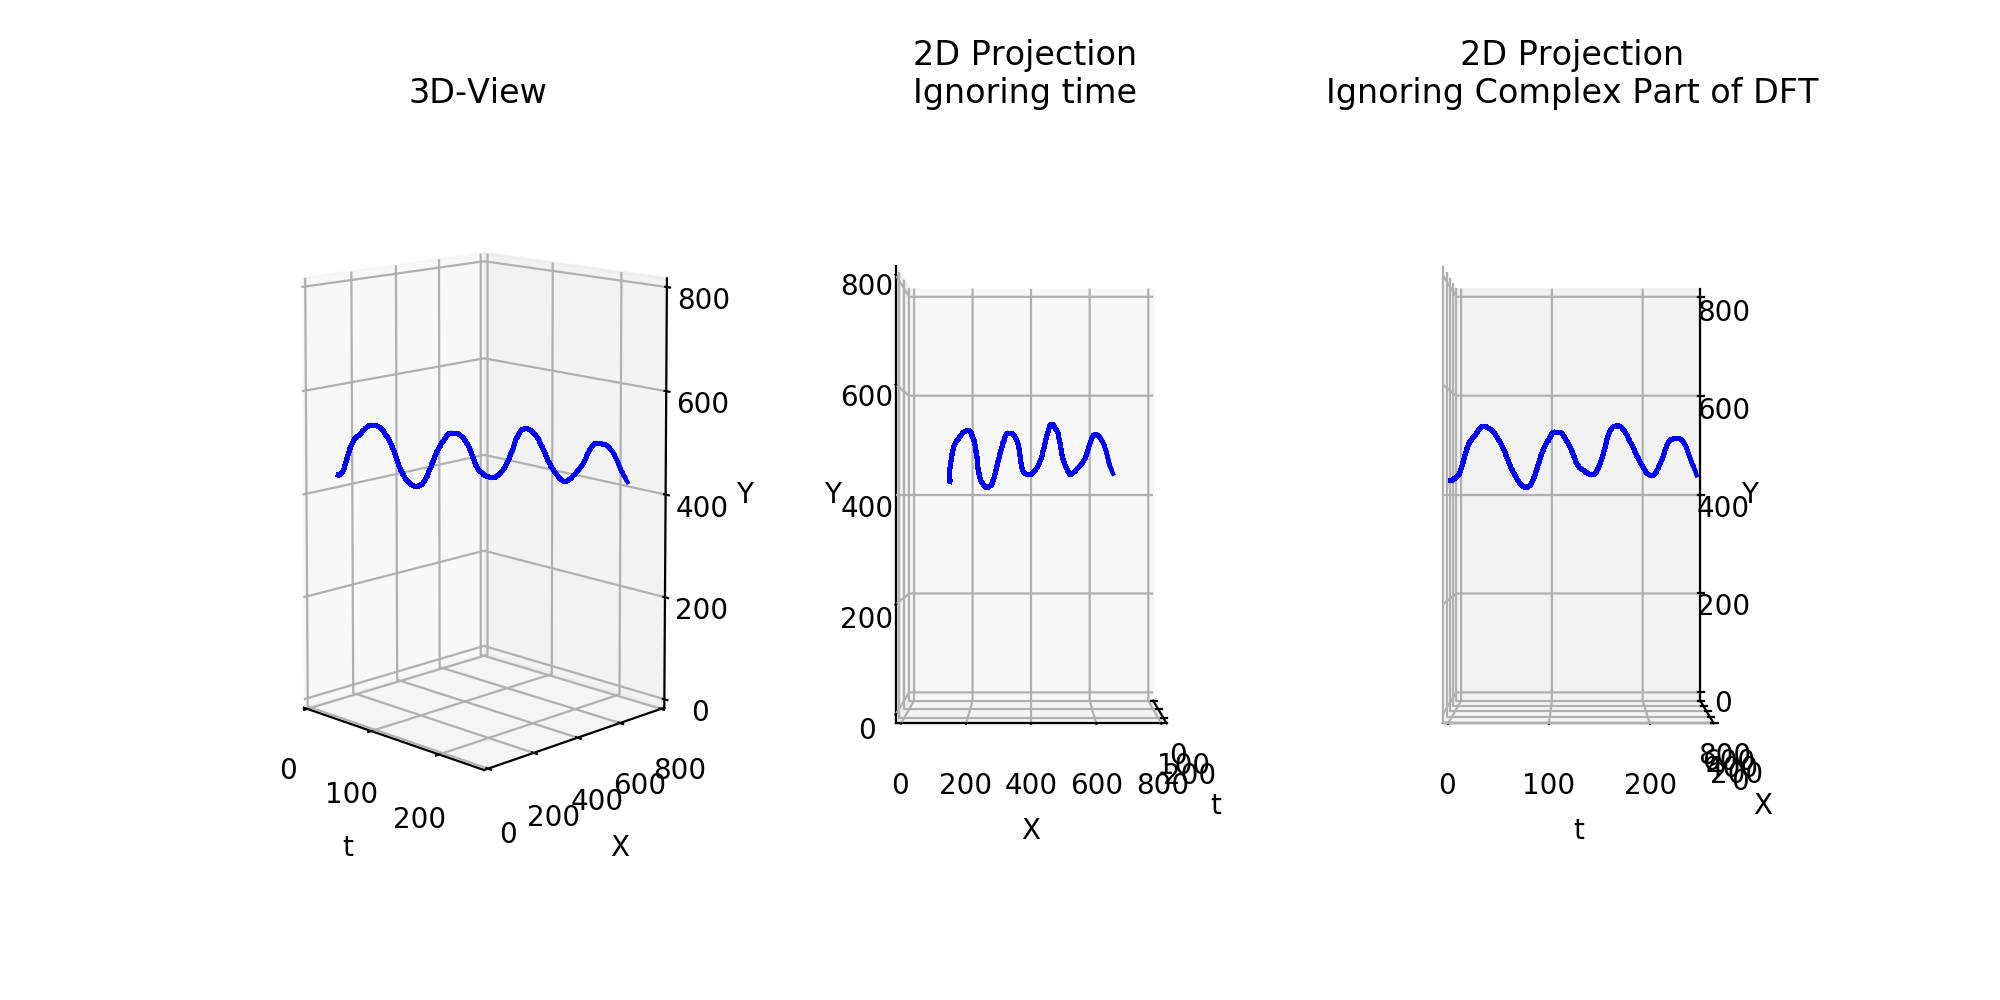

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig3D = plt.figure("3D Plot", figsize=(10,5))
ax1 = fig3D.add_subplot(131, projection='3d')
ax2 = fig3D.add_subplot(132, projection='3d')
ax3 = fig3D.add_subplot(133, projection='3d')

#first subplot
ax1.view_init(8,-45)
ax1.set_xlabel('t')
ax1.set_ylim3d([0, 800])
ax1.set_ylabel('X')
ax1.set_zlim3d([0, 800])
ax1.set_zlabel('Y')
ax1.invert_xaxis()
ax1.title.set_text("3D-View")

#second subplot
ax2.view_init(0, 0)
ax2.set_xlabel('t')
ax2.set_ylim3d([0, 800])
ax2.set_ylabel('X')
ax2.set_zlim3d([0, 800])
ax2.set_zlabel('Y')
ax2.invert_xaxis()
ax2.title.set_text("2D Projection\nIgnoring time")

#third subplot
ax3.view_init(0,-90)
ax3.set_xlabel('t')
ax3.set_ylim3d([0, 800])
ax3.set_ylabel('X')
ax3.set_zlim3d([0, 800])
ax3.set_zlabel('Y')
ax3.invert_xaxis()
ax3.title.set_text("2D Projection\nIgnoring Complex Part of DFT")
    
def init2():  
    return

def animate2(i):
    
    ax1.plot(range(i), real[:i], imag[:i], color='b')
    ax1.set_xlim3d([0.0, i])
    
    ax2.plot(range(i), real[:i], imag[:i], color='b')
    ax2.set_xlim3d([0.0, i])
    
    ax3.plot(range(i), real[:i], imag[:i], color='b')
    ax3.set_xlim3d([0.0, i])
    
    return   

anim3D=FuncAnimation(fig3D, animate2, init_func=init2, frames=N, interval=20, blit=False, repeat=False)
plt.show()

In [ ]:
# override
# saveAnimation = 1

if saveAnimation:
    anim3D.save("current-3D.mp4", writer=writer)